In [16]:
import cymetric as cym
import matplotlib as plt 
import pandas as pd
import sys 
sys.path.insert(0, '../../transition-scenarios/scripts/')
import transition_plots as tp
import numpy as np

In [17]:
from cymetric import fco_metrics
from cymetric import filters
from cymetric import timeseries

In [18]:
output_file = '../cyclus-files/oat/cooling-time/ct0.sqlite'
ev = cym.Evaluator(db=cym.dbopen(output_file),write=True)

**Deployment**

ValueError: all the input array dimensions except for the concatenation axis must match exactly

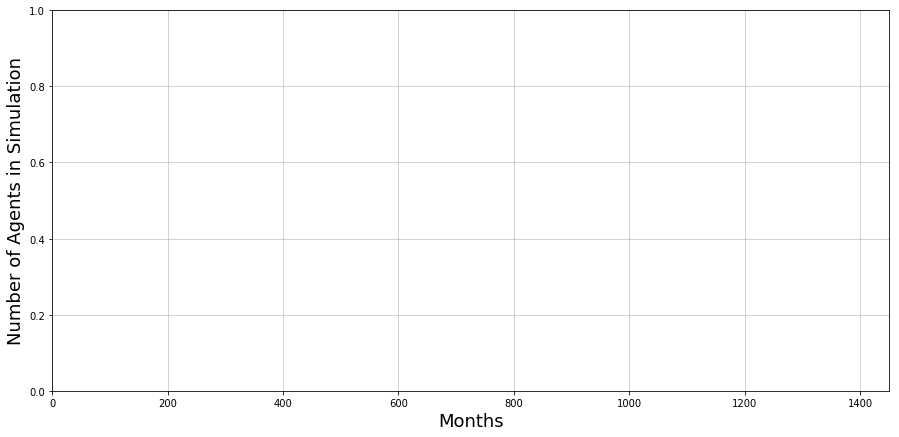

In [19]:
all_agents = tp.format_agent_dict(output_file,simple=False)
tp.plot_agents(all_agents,name='ct0',simple=False)

**Electricity Production**

In [20]:
ep = ev.eval('FcoMonthlyElectricityGenerated')

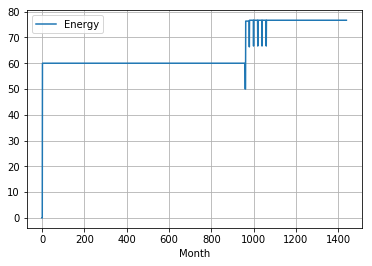

In [21]:
ep.plot(x='Month',y='Energy',grid='True')

**WM: Total HLW Inventory (Final) **

In [ ]:
hlw = cym.timeseries.transactions(ev,commodities=['lwrreprocessingwaste','moxreprocessingwaste','frreprocessingwaste'])
hlw = hlw['Mass'].cumsum()

In [ ]:
hlw.plot()

In [ ]:
hlw.iloc[-1]

**WM: Depleted Uranium (Final)**

In [5]:
du = cym.timeseries.transactions(ev,commodities=['enrichmentwaste'])
du = du['Mass'].cumsum()

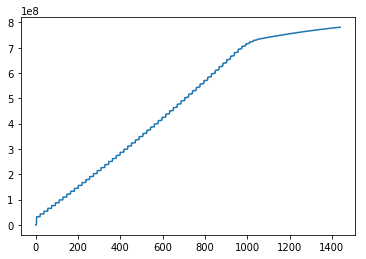

In [6]:
du.plot()

In [9]:
du.max()

780762578.89948189

**Proliferation: Pu in LWR cooling pool**

In [61]:
pu_cp_lwr = cym.timeseries.inventories(ev,facilities=['lwrstorage'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])

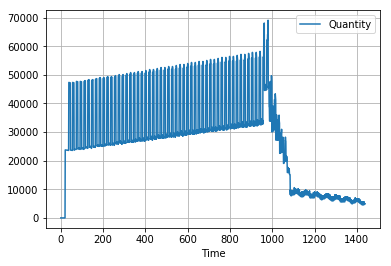

In [63]:
pu_cp_lwr.plot(x='Time',y='Quantity',grid='True')

In [66]:
pu_cp_lwr['Quantity'].max()

69095.863786378337

**Proliferation: Pu in MOX LWR cooling pool**

In [68]:
pu_cp_mox = cym.timeseries.inventories(ev,facilities=['moxstorage'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])

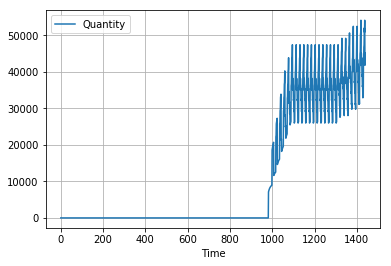

In [69]:
pu_cp_mox.plot(x='Time',y='Quantity',grid='True')

In [34]:
pu_cp_mox_cumu.max()

15211818.289332833

**Proliferation: Pu in SFR cooling pool**

In [70]:
pu_cp_fr = cym.timeseries.inventories(ev,facilities=['frstorage'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])

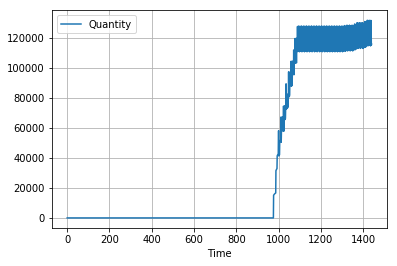

In [71]:
pu_cp_fr.plot(x='Time',y='Quantity',grid='True')

In [10]:
pu_cp_fr_cumu.max()

48928409.319328479

**Proliferation: Pu in all cooling pools**

In [72]:
pu_cp = cym.timeseries.inventories(ev,facilities=['lwrstorage','moxstorage','frstorage'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])

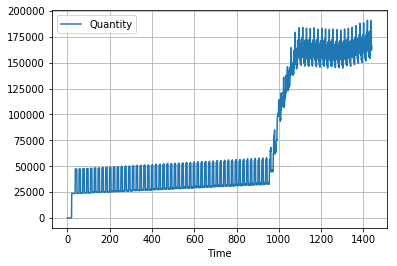

In [73]:
pu_cp.plot(x='Time',y='Quantity',grid='True')

**Proliferation: Pu in HLW**

In [74]:
pu_hlw = cym.timeseries.inventories(ev,facilities=['enrichmentsink','lwrsink','moxsink','frsink'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])

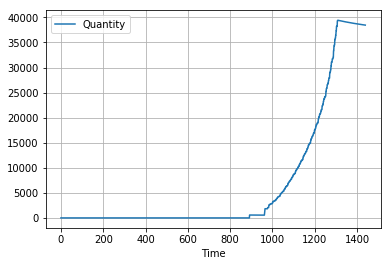

In [75]:
pu_hlw.plot(x='Time',y='Quantity',grid='True')

**Proliferation: Pu in all reprocessing plants**

In [76]:
pu_rpr = cym.timeseries.inventories(ev,facilities=['lwrreprocessing','moxreprocessing','frreprocessing'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])

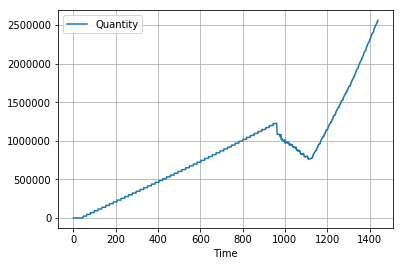

In [77]:
pu_rpr.plot(x='Time',y='Quantity',grid='True')

In [78]:
pu_rpr_fissile = cym.timeseries.inventories(ev,facilities=['lwrreprocessing','moxreprocessing','frreprocessing'],nucs=['pu-239','pu-241'])

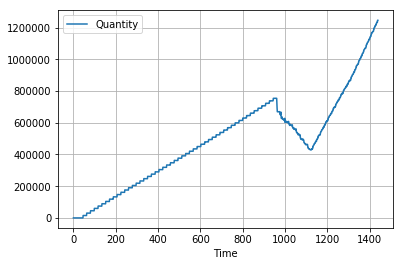

In [79]:
pu_rpr_fissile.plot(x='Time',y='Quantity',grid='True')

**Resource Utilization: Uranium Ore consumed**

In [19]:
nu = cym.timeseries.transactions(ev,commodities=['sourceout'])
nu = nu['Mass'].cumsum()

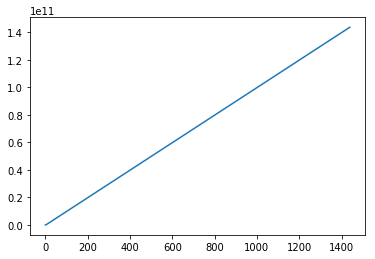

In [20]:
nu.plot()

In [21]:
nu.iloc[-1]

143700000000.0

**Goodness of Transition: Total Undersupply of Power**

In [45]:
t = np.arange(0,1440)
power = np.array(60000+250*t/12)/1000

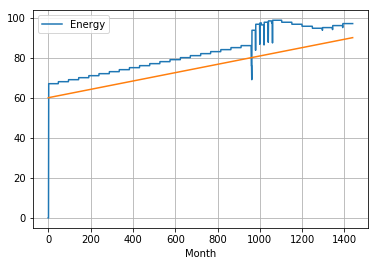

In [46]:
ep.plot(x='Month',y='Energy',grid='True')
plt.pyplot.plot(t,power)

In [57]:
diff = list(ep['Energy'])-power
total = 0
undersupply_times = {}
for x in range(len(diff)):
    if diff[x] < 0: 
        total -= diff[x]
        undersupply_times[x] = -diff[x]

In [58]:
undersupply_times

{0: 60.0,
 1: 60.020833333333336,
 960: 4.0,
 961: 4.0208333333333286,
 962: 11.041666666666671}